<div style="text-align: center; background-color: skyblue; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 15px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    PROGRAMMING FOR DATA SCIENCE<br>
    @ FIT-HCMUS, VNU-HCM<br>
    FINAL PROJECT 🏫
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA ANALYTICS AND VISUALIZATION - PART 2
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

---

### Tải bộ dữ liệu.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Tải dataset
data = pd.read_csv('../Datasets/processed-redwine-quality.csv')

# In ra một số mẫu dữ liệu
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
432,8.7,0.69,0.31,3.0,0.09,23.0,81.0,1.00,3.48,0.74,11.6,6
96,7.8,0.41,0.68,1.7,0.47,18.0,69.0,1.00,3.08,1.31,9.3,5
622,8.4,0.56,0.04,2.0,0.08,10.0,22.0,1.00,3.22,0.44,9.6,5
686,10.1,0.27,0.54,2.3,0.06,7.0,26.0,1.00,3.17,0.53,12.5,6
800,7.2,0.38,0.38,2.8,0.07,23.0,42.0,0.99,3.34,0.72,12.9,7


In [2]:
max_alcohol = data['alcohol'].max()
print(f"Highest alcohol concentration: {max_alcohol}")

Highest alcohol concentration: 14.9


## Câu hỏi 1: Các yếu tố ảnh hưởng lớn đến chất lượng rượu?

### Mục đích của việc trả lời câu hỏi này
Chúng ta sẽ thực hiện phân tích tương quan giữa các yếu tố (ví dụ như "**fixed acidity**", "**volatile acidity**", "**citric acid**",...) và chất lượng rượu ("**quality**") để nhận diện các yếu tố có ảnh hưởng mạnh nhất đến chất lượng rượu, từ đó giúp người làm rượu tối ưu quy trình sản xuất nhằm đạt chất lượng cao nhất.

### Các bước thực hiện

#### Tiền xử lý dữ liệu

Không có.

#### Analyzing

Các bước phân tích dữ liệu:

* **Tính toán ma trận tương quan**: tính toán ma trận tương quan giữa tất cả các cột trong dữ liệu và sau đó lọc ra chỉ những giá trị tương quan với "**quality**". Điều này giúp ta xác định mức độ ảnh hưởng của từng yếu tố đến chất lượng rượu.

* **Vẽ biểu đồ tương quan**: Sau khi tính toán xong tương quan, ta sẽ vẽ biểu đồ dạng cột để hiển thị mức độ tương quan của từng yếu tố với chất lượng. Các giá trị tương quan cao hơn cho thấy mối liên hệ mạnh hơn với "**quality**".

* **Giải thích kết quả**: Dựa trên biểu đồ, ta có thể thấy rõ ràng yếu tố nào có ảnh hưởng mạnh nhất và yếu tố nào ít ảnh hưởng đến chất lượng. Các yếu tố có tương quan dương cho thấy có mối liên hệ thuận, trong khi các yếu tố có tương quan âm cho thấy có mối liên hệ nghịch.

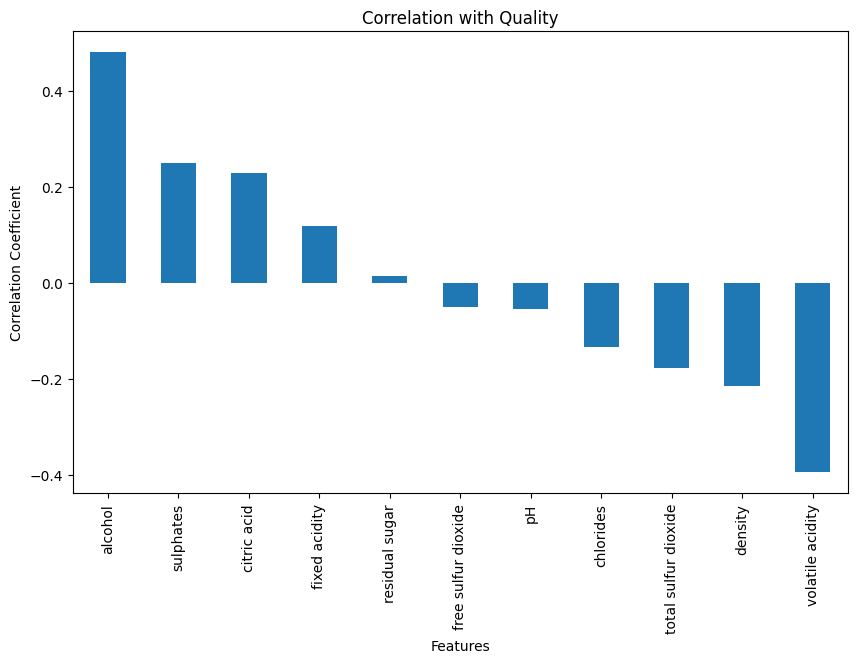

In [3]:
correlation_with_quality = data.corr()
correlation_with_quality = correlation_with_quality['quality'].drop('quality')
correlation_with_quality = correlation_with_quality.sort_values(ascending=False)

correlation_with_quality.plot(kind='bar', figsize=(10, 6))
plt.title('Correlation with Quality')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

#### Kết luận
* **alcohol** có hệ số tương quan là 0.480343, nghĩa là lượng **alcohol** có mối quan hệ dương mạnh với chất lượng rượu.
* **sulphates** (0.248835) và **citric acid** (0.228057) cũng có mối quan hệ dương nhưng yếu hơn.
* Các yếu tố như **volatile acidity** (-0.395214) và **density** (-0.184252) có mối quan hệ tiêu cực mạnh hơn, nghĩa là càng có nhiều acid dễ bay hơi hay mật độ cao thì chất lượng rượu có xu hướng giảm.

## Câu hỏi 2: Các ngưỡng giá trị fixed acidity, volatile acidity, citric acid cho ra chất lượng rượu cao nhất?

Từng yếu tố acid đều có những ảnh hưởng nhất định đến rượu:

* Fixed acidity: giữ vai trò quan trọng trong việc tạo nên độ chua tự nhiên của rượu vang. Độ chua
từ các acid cố định giúp cân bằng vị ngọt của rượu vang, đặc biệt là đối với các loại rượu có
lượng đường thấp.
* Volatile Acidity: khiến rượu vang có mùi giấm, dấu hiệu của một quá trình lên men không hoàn
hảo hoặc sự phát triển của vi khuẩn không mong muốn trong rượu.
* Citric Acid: tăng cường vị tươi mát và có vai trò quan trọng trong việc tạo ra cảm giác ngọt ngào
tự nhiên cho rượu vang.

Tất cả các loại acid này có vai trò quan trọng trong việc tạo ra chất lượng và hương vị của rượu vang,
nhưng cần phải được kiểm soát ở mức độ hợp lý để đạt được sự cân bằng hoàn hảo trong rượu. Công
việc của phần này là tìm ra ngưỡng hợp lý của từng loại acid trên

### Các bước thực hiện

#### Tiền xử lý dữ liệu

* **Bước 1**: Tính toán phần trăm thứ 75 của cột chất lượng.
	- Sử dụng phương thức `quantile` của pandas để tính toán giá trị phần trăm thứ 75 của cột `quality`. 
	- 75th percentile là giá trị mà 75% các dữ liệu nhỏ hơn hoặc bằng, và 25% các dữ liệu lớn hơn.
	- Giá trị này sẽ được sử dụng làm ngưỡng để xác định 25% rượu có chất lượng cao nhất.
* **Bước 2**: Lọc dataframe để lấy ra 25% rượu có chất lượng cao nhất.
* **Bước 3**: Hiển thị kết quả.

In [7]:
# Calculate the 75th percentile of the quality column
top_25_percentile = data['quality'].quantile(0.75)

# Filter the dataframe to get the top 25% quality wines
top_25_quality = data[data['quality'] >= top_25_percentile]

# Display the result
top_25_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,volatile_alcohol_ratio
3,11.2,0.28,0.56,1.9,0.08,17.0,60.0,1.00,3.16,0.58,9.8,6,0.028571
6,7.3,0.65,0.00,1.2,0.06,15.0,21.0,0.99,3.39,0.47,10.0,7,0.065000
7,7.8,0.58,0.02,2.0,0.07,9.0,18.0,1.00,3.36,0.57,9.5,7,0.061053
14,8.5,0.28,0.56,1.8,0.09,35.0,103.0,1.00,3.30,0.75,10.5,7,0.026667
17,7.9,0.32,0.51,1.8,0.34,17.0,56.0,1.00,3.04,1.08,9.2,6,0.034783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,5.4,0.74,0.09,1.7,0.09,16.0,26.0,0.99,3.67,0.56,11.6,6,0.063793
1344,6.3,0.51,0.13,2.3,0.08,29.0,40.0,1.00,3.42,0.75,11.0,6,0.046364
1345,6.8,0.62,0.08,1.9,0.07,28.0,38.0,1.00,3.42,0.82,9.5,6,0.065263
1347,5.9,0.55,0.10,2.2,0.06,39.0,51.0,1.00,3.52,0.76,11.2,6,0.049107


#### Analyzing

Các bước thực hiện phần phân tích

* **Bước 1**: Tạo các biểu đồ phân phối tần suất cho các yếu tố **fixed acidity**, **volatile acidity**, và **citric acid**.
	* Giúp phát hiện khoảng giá trị các yếu tố acid của rượu có chất lượng cao, so với toàn bộ tập dữ liệu.
	* Nếu nhóm top 25% tập trung ở một khoảng giá trị cụ thể, điều này gợi ý rằng giá trị đó có thể liên quan đến chất lượng rượu cao.


* **Bước 2**: Sử dụng hàm `hist()` của matplotlib để vẽ biểu đồ phân phối tần suất cho toàn bộ dữ liệu và dữ liệu của top 25% chất lượng rượu.

* **Bước 4**: Sử dụng `plt.tight_layout()` để điều chỉnh bố cục của các biểu đồ.

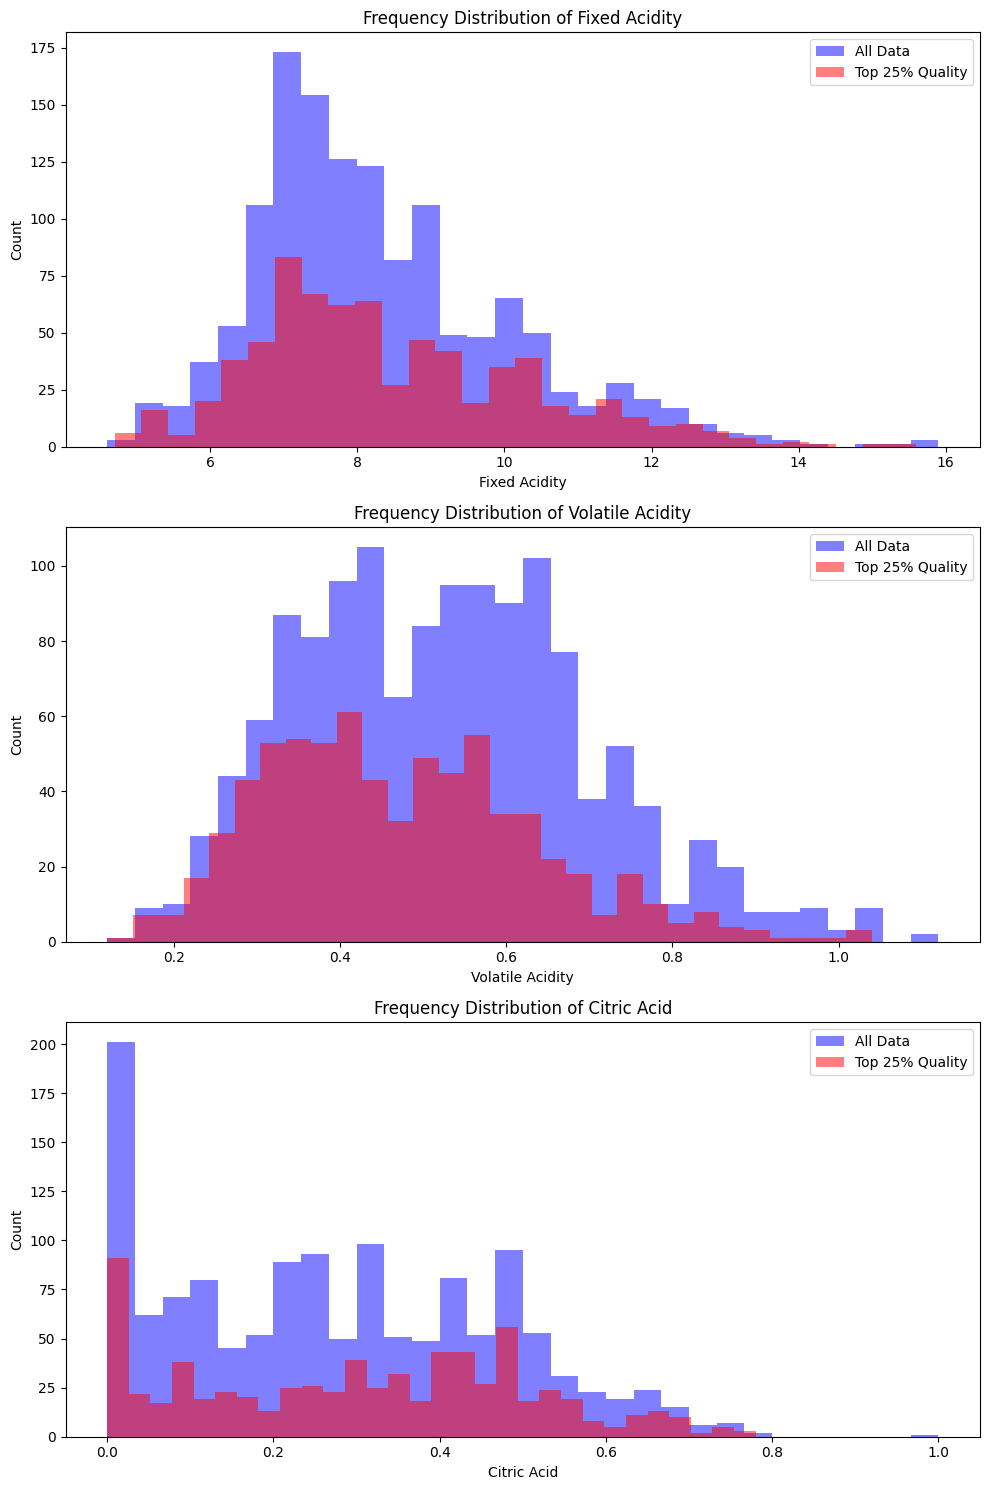

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for fixed acidity
axes[0].hist(data['fixed acidity'], bins=30, alpha=0.5, label='All Data', color='blue')
axes[0].hist(top_25_quality['fixed acidity'], bins=30, alpha=0.5, label='Top 25% Quality', color='red')
axes[0].set_title('Frequency Distribution of Fixed Acidity')
axes[0].set_xlabel('Fixed Acidity')
axes[0].set_ylabel('Count')
axes[0].legend()

# Plot for volatile acidity
axes[1].hist(data['volatile acidity'], bins=30, alpha=0.5, label='All Data', color='blue')
axes[1].hist(top_25_quality['volatile acidity'], bins=30, alpha=0.5, label='Top 25% Quality', color='red')
axes[1].set_title('Frequency Distribution of Volatile Acidity')
axes[1].set_xlabel('Volatile Acidity')
axes[1].set_ylabel('Count')
axes[1].legend()

# Plot for citric acid
axes[2].hist(data['citric acid'], bins=30, alpha=0.5, label='All Data', color='blue')
axes[2].hist(top_25_quality['citric acid'], bins=30, alpha=0.5, label='Top 25% Quality', color='red')
axes[2].set_title('Frequency Distribution of Citric Acid')
axes[2].set_xlabel('Citric Acid')
axes[2].set_ylabel('Count')
axes[2].legend()

plt.tight_layout()
plt.show()

#### Kết luận 
Dựa vào biểu đồ, ta có thể đưa ra các nhận xét:
* Fixed acidity: top25 chiếm ưu thế ở xung quanh các giá trị acid = {3, 6.4, 7.2} và khoảng (10.3, 15.5)
	* Giá trị fixed acidity ở top 25% có xu hướng tập trung vào một số mức cố định thay vì phân bố đều như toàn bộ dữ liệu. 
* Volatile acidity: top25 chiếm ưu thế ở khoảng (0.1, 0.4)
	* Nồng độ volatile acidity thấp (0.1 - 0.4) có thể liên quan đến việc hạn chế hương vị "chua gắt" hoặc các yếu tố không mong muốn do quá trình lên men kém kiểm soát.
	* Gợi ý rằng rượu vang chất lượng cao có xu hướng kiểm soát tốt lượng acid dễ bay hơi để giữ hương vị hài hòa.
* Citric acidity: top25 chiếm ưu thế không rõ ràng, rải rác ở các điểm giá trị {0.55, 0.68}
	* Citric acid có thể không phải là yếu tố hóa học quyết định trực tiếp đến chất lượng rượu.

Kết luận chung
* Fixed acidity và volatile acidity dường như có mối liên hệ chặt chẽ với chất lượng rượu:
	* Fixed acidity đóng vai trò trong việc xác định cơ cấu vị chua tổng thể.
	* Volatile acidity thấp giúp duy trì sự hài hòa hương vị, hạn chế khuyết điểm.
* Citric acid có ảnh hưởng không đáng kể hoặc không mang tính quyết định.

Dựa trên các kết quả này, các nhà sản xuất rượu có thể tập trung kiểm soát fixed acidity và volatile acidity để tối ưu chất lượng sản phẩm.